In [1]:
import pandas as pd 

data = pd.read_csv('final_data_4_classes.csv')

In [2]:
data.shape

(122662, 127)

In [3]:
for col in data.columns:
    print(col)

time
rotationRateX
rotationRateY
rotationRateZ
gravityX
gravityY
gravityZ
accelerationX
accelerationY
accelerationZ
quaternionW
quaternionX
quaternionY
quaternionZ
z_gyro
y_gyro
x_gyro
z_acc
y_acc
x_acc
bpm
sport
cluster
PCA1
PCA2
rotationRateX_mean5
rotationRateY_mean5
rotationRateZ_mean5
gravityX_mean5
gravityY_mean5
gravityZ_mean5
accelerationX_mean5
accelerationY_mean5
accelerationZ_mean5
quaternionW_mean5
quaternionX_mean5
quaternionY_mean5
quaternionZ_mean5
z_gyro_mean5
y_gyro_mean5
x_gyro_mean5
z_acc_mean5
y_acc_mean5
x_acc_mean5
bpm_mean5
rotationRateX_mean20
rotationRateY_mean20
rotationRateZ_mean20
gravityX_mean20
gravityY_mean20
gravityZ_mean20
accelerationX_mean20
accelerationY_mean20
accelerationZ_mean20
quaternionW_mean20
quaternionX_mean20
quaternionY_mean20
quaternionZ_mean20
z_gyro_mean20
y_gyro_mean20
x_gyro_mean20
z_acc_mean20
y_acc_mean20
x_acc_mean20
bpm_mean20
rotationRateX_mean100
rotationRateY_mean100
rotationRateZ_mean100
gravityX_mean100
gravityY_mean100
gravi

In [4]:
target = data['sport']
features = data.drop(['sport','time'],axis = 1)

In [5]:
features.shape,target.shape

((122662, 125), (122662,))

In [6]:
features.head()

,rotationRateX,rotationRateY,rotationRateZ,gravityX,gravityY,gravityZ,accelerationX,accelerationY,accelerationZ,quaternionW,...,z_acc_dominant_freq,z_acc_spectral_entropy,y_acc_dominant_freq,y_acc_spectral_entropy,x_acc_dominant_freq,x_acc_spectral_entropy,bpm_dominant_freq,bpm_spectral_entropy,sport_dominant_freq,sport_spectral_entropy
0,0.008702,0.004451,-0.053711,0.250074,0.743829,-0.619823,0.010211,0.003287,0.014889,0.060645,...,0.08,-898.398179,0.16,-169.587814,0.18,-45.370704,0.00,-0.000000,0.0,-0.0
1,-0.041900,-0.013676,-0.039748,0.249034,0.744015,-0.620019,0.006414,-0.010357,0.002985,0.061467,...,0.06,-1187.112990,0.12,-304.806051,0.18,-42.070148,0.00,-0.000000,0.0,-0.0
2,-0.035148,-0.017830,-0.018111,0.248184,0.745646,-0.618399,-0.006378,0.008230,-0.014505,0.061480,...,0.06,-1287.710856,0.12,-327.428317,0.18,-52.374114,0.00,0.205226,0.0,-0.0
3,0.017548,-0.015216,-0.003710,0.247961,0.745757,-0.618355,0.013742,-0.001830,-0.013985,0.061511,...,0.06,-1355.606502,0.12,-297.733907,0.18,-45.328373,0.00,-0.000000,0.0,-0.0
4,-0.039274,-0.023545,0.018222,0.246873,0.746133,-0.618336,0.003051,-0.015145,0.010258,0.061251,...,0.06,-1492.104214,0.12,-477.047415,0.18,-59.189818,0.02,-13.724500,0.0,-0.0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,stratify = target)

# Normalize/Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection with a weak learner (e.g., RandomForest)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_



NameError: name 'X' is not defined

In [8]:

# Select top features
important_features = pd.Series(importances, index=features.columns).nlargest(20).index
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Train a classifier (e.g., SVM)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = svc.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.93      0.94      6764
           2       0.97      0.94      0.95      7527
           3       0.93      0.96      0.94      4625
           4       0.95      0.99      0.97      5617

    accuracy                           0.95     24533
   macro avg       0.95      0.96      0.95     24533
weighted avg       0.95      0.95      0.95     24533

[[6296  193  175  100]
 [ 103 7063  174  187]
 [ 172    4 4449    0]
 [   0   46    0 5571]]
              precision    recall  f1-score   support

           1       0.96      0.93      0.94      6764
           2       0.97      0.94      0.95      7527
           3       0.93      0.96      0.94      4625
           4       0.95      0.99      0.97      5617

    accuracy                           0.95     24533
   macro avg       0.95      0.96      0.95     24533
weighted avg       0.95      0.95      0.95     24533

[[6296  193  175  100]
 [ 103 7063  1

In [9]:
important_features

Index(['y_acc_mean100', 'gravityZ_mean100', 'gravityZ_mean20', 'bpm_mean5',
       'gravityZ_mean5', 'gravityZ', 'bpm_mean20', 'bpm_mean100',
       'gravityY_mean100', 'bpm', 'gravityX_mean100', 'gravityY_mean20',
       'gravityX_mean20', 'y_acc_mean20', 'z_acc_mean100',
       'quaternionY_mean20', 'quaternionW_mean100', 'quaternionW_mean20',
       'gravityX_mean5', 'PCA1'],
      dtype='object')

In [13]:
# Evaluate the model
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6764
           2       1.00      1.00      1.00      7527
           3       1.00      1.00      1.00      4625
           4       1.00      1.00      1.00      5617

    accuracy                           1.00     24533
   macro avg       1.00      1.00      1.00     24533
weighted avg       1.00      1.00      1.00     24533

[[6764    0    0    0]
 [   0 7527    0    0]
 [   0    1 4624    0]
 [   0    0    0 5617]]


# Temporal train test split

In [14]:
target = data['sport']
features = data.drop(['sport'],axis = 1)

In [17]:
def custom_train_test_split(data, split_ratio): 
    # Initialize lists to hold training and testing data
    train_data = []
    test_data = []

    # Perform the split for each class
    for label in data['sport'].unique():
        class_data = data[data['sport'] == label]
        split_point = int(len(class_data) * split_ratio)

        train_data.append(class_data.iloc[:split_point])
        test_data.append(class_data.iloc[split_point:])

    # Combine the splits
    train_data = pd.concat(train_data)
    test_data = pd.concat(test_data)

    # Separate features and labels
    X_train = train_data.drop(['sport', 'time'], axis=1)  
    y_train = train_data['sport']
    X_test = test_data.drop(['sport', 'time'], axis=1)
    y_test = test_data['sport']

    return X_train,X_test,y_train,y_test

def normalize_data(X_train, X_test):
    # Normalize/Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_train_scaled








In [18]:
#split train test
split_ratio = 0.75
X_train,X_test,y_train,y_test = custom_train_test_split(data, split_ratio)

#normalize feature data
X_train_scaled,X_train_scaled = normalize_data(X_train, X_test)


In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((91995, 125), (30667, 125), (91995,), (30667,))

In [22]:
# Feature Selection with a weak learner (e.g., RandomForest)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
importances = rf.feature_importances_



# Random Forest Base Model All Data

In [23]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98      8455
           2       0.89      1.00      0.94      9409
           3       1.00      1.00      1.00      5782
           4       1.00      0.88      0.94      7021

    accuracy                           0.96     30667
   macro avg       0.97      0.96      0.97     30667
weighted avg       0.97      0.96      0.96     30667

[[8159  296    0    0]
 [   0 9409    0    0]
 [   0    0 5782    0]
 [   0  815    0 6206]]


# Feature Selection with Forward Selection

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, TimeSeriesSplit
import time
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier


accuracies = []

#initialize variables
selected_features = []
remaining_features = list(X_train.columns)
best_accuracy = 0
stop_threshold = 0.00001  #minimum accuracy improvement to continue adding


# Define StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=False)


time1 = time.time()
#perform forward feature selection
while remaining_features:
    #time
    time3 = time.time()
    
    best_feature = None
    best_feature_accuracy = 0
    
    # evaluate each feature
    for feature in remaining_features:
        current_features = selected_features + [feature]
        model = DecisionTreeClassifier()
        
        #cv for evaluation
        cv_scores = cross_val_score(model, X_train[current_features], y_train, cv=skf, scoring='accuracy',n_jobs=-1)
        mean_cv_score = cv_scores.mean()
        
        if mean_cv_score > best_feature_accuracy:
            best_feature_accuracy = mean_cv_score
            best_feature = feature
    
    #check if the best feature improves the model
    if best_feature_accuracy > best_accuracy:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_accuracy = best_feature_accuracy
        accuracies.append(best_feature_accuracy)
        time4 = time.time()
        print(f"Selected feature: {best_feature}, Accuracy: {best_feature_accuracy}, time elapsed = {round(time4-time3,2)}")
    else:
        break
    
    
time2 = time.time()
print(f'Total time for dorward feature selection is {round(time2-time1,2)}')

Selected feature: gravityX_mean100, Accuracy: 0.7971520191314745, time elapsed = 40.79
Selected feature: y_acc_mean100, Accuracy: 0.9610304907875428, time elapsed = 63.92
Selected feature: gravityZ_mean20, Accuracy: 0.9741725093755095, time elapsed = 55.37
Selected feature: accelerationX_mean100, Accuracy: 0.9875210609272242, time elapsed = 64.24
Selected feature: rotationRateY_dominant_freq, Accuracy: 0.9889559215174739, time elapsed = 68.04
Selected feature: y_acc, Accuracy: 0.9891081037012881, time elapsed = 69.92
Selected feature: quaternionY, Accuracy: 0.989445078536877, time elapsed = 83.74
Total time for dorward feature selection is 540.06


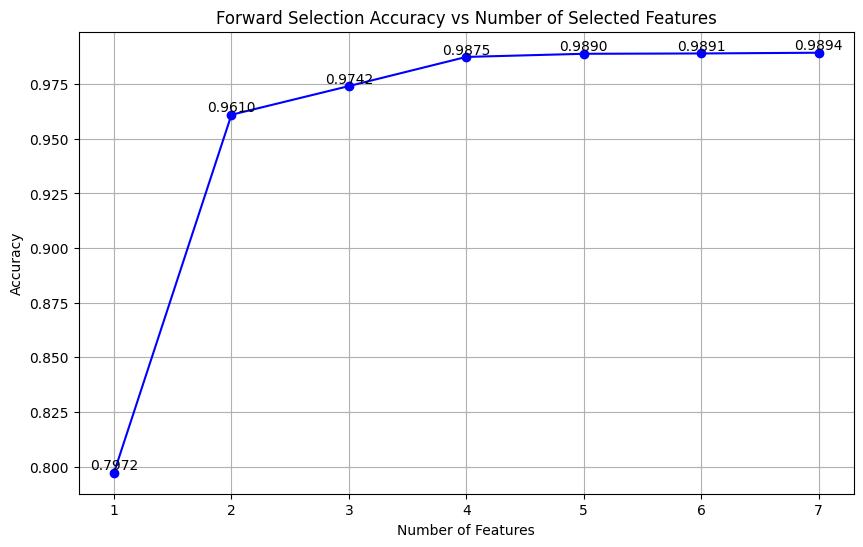

In [46]:
import matplotlib.pyplot as plt

# Create a plot for the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')

# Add accuracy values on top of each point
for i, accuracy in enumerate(accuracies, start=1):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Forward Selection Accuracy vs Number of Selected Features')
plt.grid(True)
plt.xticks(range(1, len(accuracies) + 1)) 
plt.show()

In [50]:
print(f'Selected features after forward selection:')
selected_features

Selected features after forward selection:


['gravityX_mean100',
 'y_acc_mean100',
 'gravityZ_mean20',
 'accelerationX_mean100',
 'rotationRateY_dominant_freq',
 'y_acc',
 'quaternionY']

In [ ]:
y_train = y_train -1
y_test = y_test - 1

y_train.unique()

# Model Selection

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'XGBClassifier': xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LGBMClassifier': lgb.LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}
#define StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=False)

#dictionary to store accuracy scores
model_accuracies = {}

#evaluate each model using cross-validation
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=skf, scoring='accuracy', n_jobs=-1)
    mean_cv_score = cv_scores.mean()
    model_accuracies[name] = mean_cv_score
    print(f"{name} Accuracy: {mean_cv_score}")

#print all accuracy scores
print("\nModel accuracies:")
for name, acc in model_accuracies.items():
    print(f"{name}: {acc}")


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Training and evaluating Logistic Regression...
Logistic Regression Accuracy: 0.9805967715636721
Training and evaluating SVC...
SVC Accuracy: 0.982292515897603
Training and evaluating Random Forest...
Random Forest Accuracy: 0.9925648133050708
Training and evaluating Naive Bayes...
Naive Bayes Accuracy: 0.9756182401217458
Training and evaluating KNN...
KNN Accuracy: 0.9873580085874233
Training and evaluating XGBClassifier...


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier Accuracy: 0.991477797706397
Training and evaluating LGBMClassifier...
LGBMClassifier Accuracy: 0.9898146638404262

Model accuracies:
Logistic Regression: 0.9805967715636721
SVC: 0.982292515897603
Random Forest: 0.9925648133050708
Naive Bayes: 0.9756182401217458
KNN: 0.9873580085874233
XGBClassifier: 0.991477797706397
LGBMClassifier: 0.9898146638404262


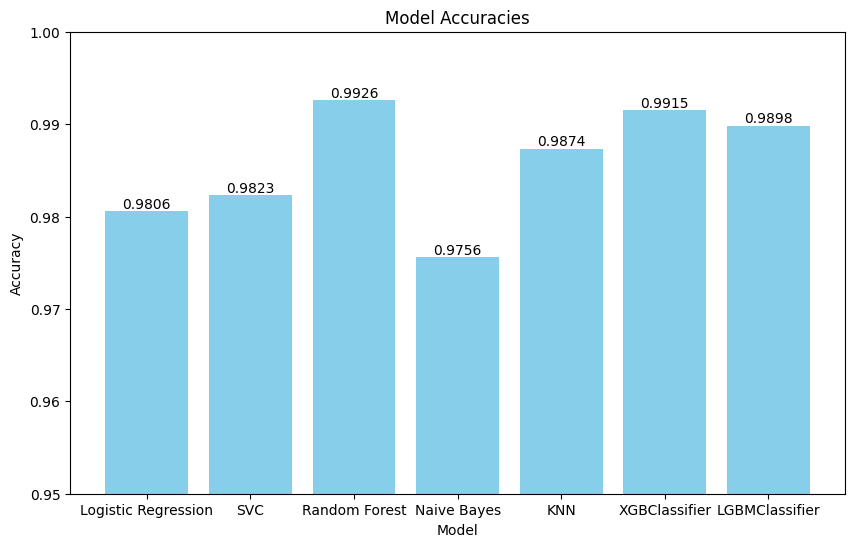

In [60]:
import matplotlib.pyplot as plt

#create a bar plot for the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.ylim(0.95, 1)  # Set the y-axis range between 0.95 and 1
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

#annotate the bars with the accuracy values
for i, (model, accuracy) in enumerate(model_accuracies.items()):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()


# Train a Random Forest Algorithm and Confusion Matrix

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
baseline_rf_model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs = -1)
baseline_rf_model.fit(X_train[selected_features], y_train)



RandomForestClassifier(n_jobs=-1, random_state=42)

In [68]:

# Predict on the test set
y_pred = baseline_rf_model.predict(X_test[selected_features])

# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy on Test Set: {baseline_accuracy}")

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Baseline Model Accuracy on Test Set: 0.9536309387941435
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8455
           1       0.87      1.00      0.93      9409
           2       1.00      1.00      1.00      5782
           3       1.00      0.82      0.90      7021

    accuracy                           0.95     30667
   macro avg       0.97      0.95      0.96     30667
weighted avg       0.96      0.95      0.95     30667

Confusion Matrix:
[[8329  126    0    0]
 [   0 9405    0    4]
 [   0    0 5782    0]
 [   0 1292    0 5729]]


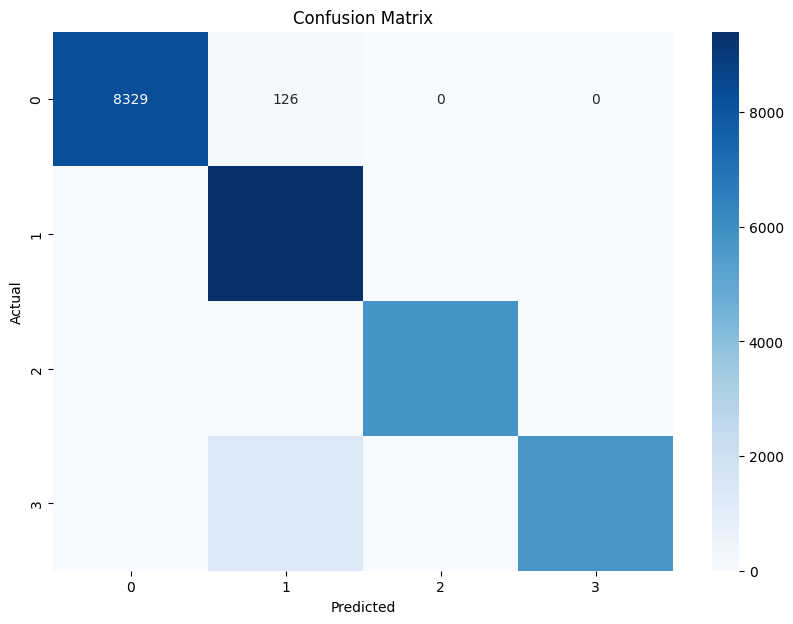

In [69]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optuna Hyperparameter Tuning

In [71]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the objective function
def objective(trial):
    # Define the hyperparameter space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Create the model with the current hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    # Define StratifiedKFold cross-validator
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(model, X_train[selected_features], y_train, cv=skf, scoring='accuracy', n_jobs=-1)
    mean_cv_score = cv_scores.mean()
    
    return mean_cv_score

# Create an Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)


[I 2024-06-15 20:53:19,222] A new study created in memory with name: no-name-0c7aeef8-ec02-4f38-814f-2cf8dff4200e
[I 2024-06-15 20:53:44,226] Trial 0 finished with value: 0.992271319093429 and parameters: {'n_estimators': 478, 'max_features': 'auto', 'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 8, 'bootstrap': True}. Best is trial 0 with value: 0.992271319093429.
[I 2024-06-15 20:54:15,837] Trial 1 finished with value: 0.9923474101853362 and parameters: {'n_estimators': 604, 'max_features': 'log2', 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 1 with value: 0.9923474101853362.
[I 2024-06-15 20:54:27,661] Trial 2 finished with value: 0.9921626175335616 and parameters: {'n_estimators': 147, 'max_features': 'auto', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 1 with value: 0.9923474101853362.
[I 2024-06-15 20:54:44,607] Trial 3 finished with value: 0.992727865644872 a

[I 2024-06-15 21:06:05,685] Trial 29 finished with value: 0.9923582803413229 and parameters: {'n_estimators': 457, 'max_features': 'sqrt', 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 6, 'bootstrap': True}. Best is trial 12 with value: 0.9929017881406598.
[I 2024-06-15 21:06:45,368] Trial 30 finished with value: 0.9926409043969782 and parameters: {'n_estimators': 511, 'max_features': 'auto', 'max_depth': 42, 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 12 with value: 0.9929017881406598.
[I 2024-06-15 21:06:58,467] Trial 31 finished with value: 0.9927387358008588 and parameters: {'n_estimators': 174, 'max_features': 'log2', 'max_depth': 45, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 12 with value: 0.9929017881406598.
[I 2024-06-15 21:07:10,792] Trial 32 finished with value: 0.9928583075167129 and parameters: {'n_estimators': 160, 'max_features': 'log2', 'max_depth': 48, 'min_samples_split': 10, '

In [72]:

# Get the best hyperparameters
best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")




Best Parameters: {'n_estimators': 153, 'max_features': 'log2', 'max_depth': 46, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.9929778792325671


Final Model Accuracy on Test Set: 0.9557178726318192
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8455
           1       0.87      1.00      0.93      9409
           2       1.00      1.00      1.00      5782
           3       1.00      0.82      0.90      7021

    accuracy                           0.96     30667
   macro avg       0.97      0.95      0.96     30667
weighted avg       0.96      0.96      0.96     30667

[[8331  123    0    1]
 [   0 9407    0    2]
 [   0    0 5782    0]
 [   0 1232    0 5789]]


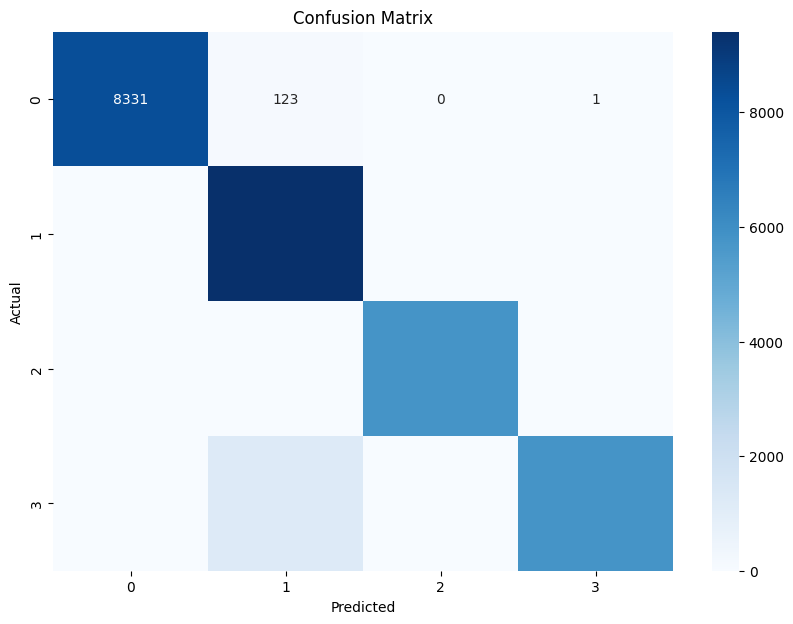

In [73]:
# Train the final model with the best parameters on the full training set
final_rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
final_rf_model.fit(X_train[selected_features], y_train)

# Evaluate the final model on the test set
y_pred = final_rf_model.predict(X_test[selected_features])
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Model Accuracy on Test Set: {final_accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# n_estimators visualisation

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store accuracies for each iteration
train_accuracies = []
test_accuracies = []

# Initialize the Random Forest model with warm_start=True
final_rf_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1, warm_start=True)

# Set the initial number of estimators
n_estimators_start = 10  # Starting number of trees
final_rf_model.set_params(n_estimators=n_estimators_start)

# Fit the model incrementally and record accuracies
for i in range(n_estimators_start, best_params['n_estimators'] + 400, 10):
    final_rf_model.set_params(n_estimators=i)
    final_rf_model.fit(X_train[selected_features], y_train)
    
    # Calculate training accuracy
    train_pred = final_rf_model.predict(X_train[selected_features])
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    test_pred = final_rf_model.predict(X_test[selected_features])
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)
    
    print(f"Number of Trees: {i}, Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")


Number of Trees: 10, Training Accuracy: 0.9999891298440132, Test Accuracy: 0.946913620504125
Number of Trees: 20, Training Accuracy: 0.9999891298440132, Test Accuracy: 0.9469462288453386
Number of Trees: 30, Training Accuracy: 1.0, Test Accuracy: 0.9515113966152542
Number of Trees: 40, Training Accuracy: 0.9999891298440132, Test Accuracy: 0.9526526885577331
Number of Trees: 50, Training Accuracy: 1.0, Test Accuracy: 0.9529135552874425
Number of Trees: 60, Training Accuracy: 1.0, Test Accuracy: 0.9539896305474941
Number of Trees: 70, Training Accuracy: 1.0, Test Accuracy: 0.9543157139596309
Number of Trees: 80, Training Accuracy: 1.0, Test Accuracy: 0.9544461473244856
Number of Trees: 90, Training Accuracy: 1.0, Test Accuracy: 0.9542831056184172
Number of Trees: 100, Training Accuracy: 1.0, Test Accuracy: 0.9542504972772035
Number of Trees: 110, Training Accuracy: 1.0, Test Accuracy: 0.9547070140541951
Number of Trees: 120, Training Accuracy: 1.0, Test Accuracy: 0.9547396223954088
Numbe

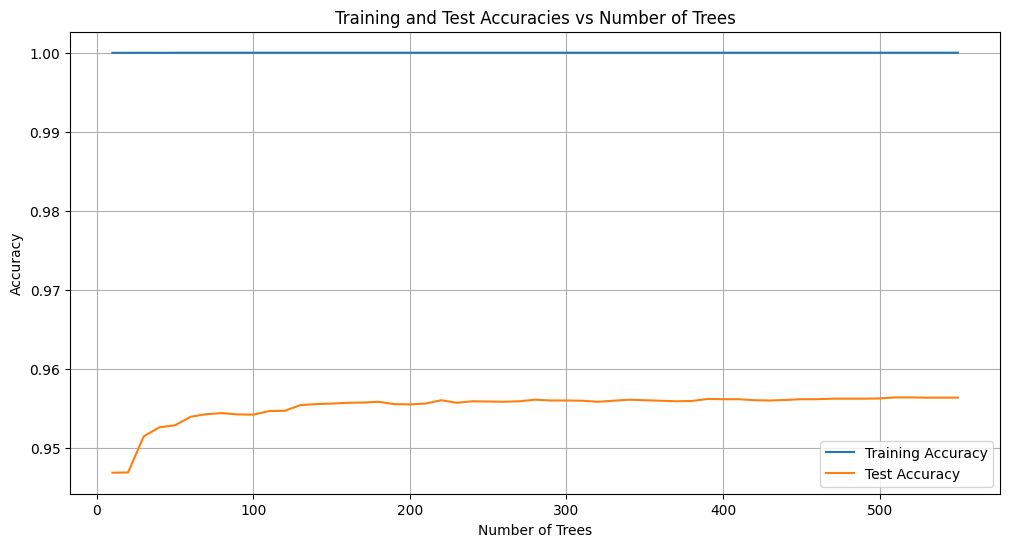

In [79]:

# Plot the accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(n_estimators_start, best_params['n_estimators'] + 400, 10), train_accuracies, label='Training Accuracy')
plt.plot(range(n_estimators_start, best_params['n_estimators'] + 400, 10), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()


Final Model Accuracy on Test Set: 0.9564026477973065
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8455
           1       0.88      1.00      0.93      9409
           2       1.00      1.00      1.00      5782
           3       1.00      0.83      0.91      7021

    accuracy                           0.96     30667
   macro avg       0.97      0.95      0.96     30667
weighted avg       0.96      0.96      0.96     30667

[[8334  120    0    1]
 [   0 9406    0    3]
 [   0    0 5782    0]
 [   0 1213    0 5808]]


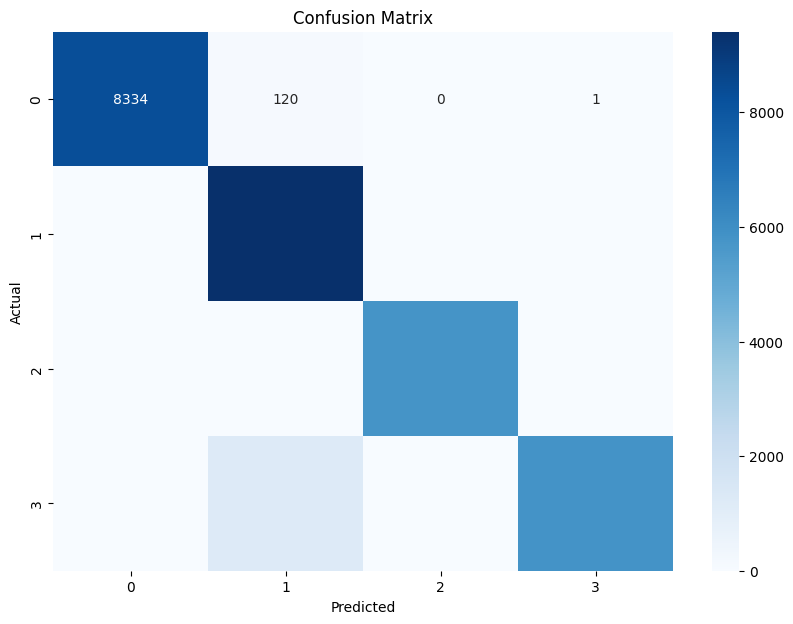

In [80]:

# Final evaluation on the test set
y_pred = final_rf_model.predict(X_test[selected_features])
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Model Accuracy on Test Set: {final_accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# for all other params

max_features=auto, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_features=sqrt, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_features=log2, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


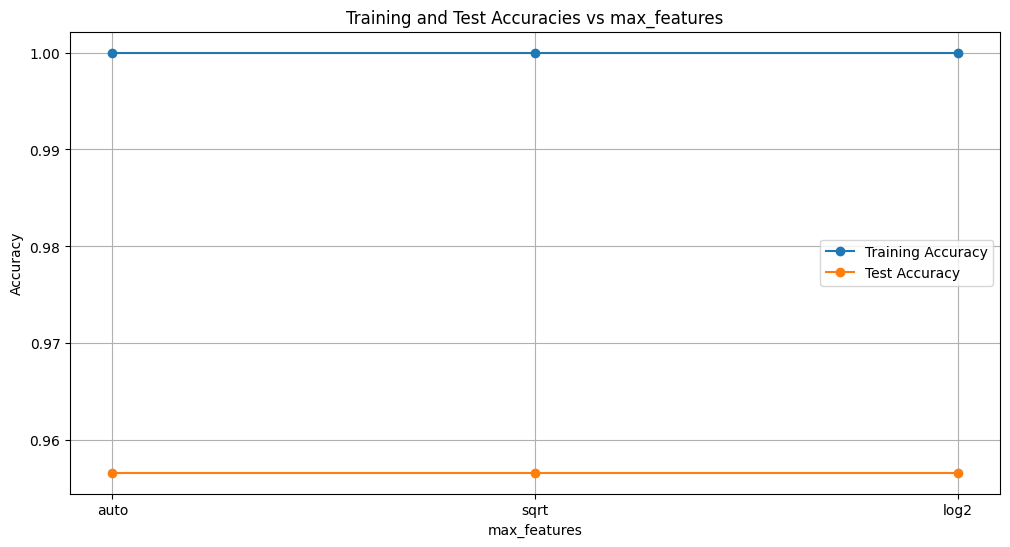

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_depth=10, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_depth=20, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_depth=30, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_depth=40, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


max_depth=50, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


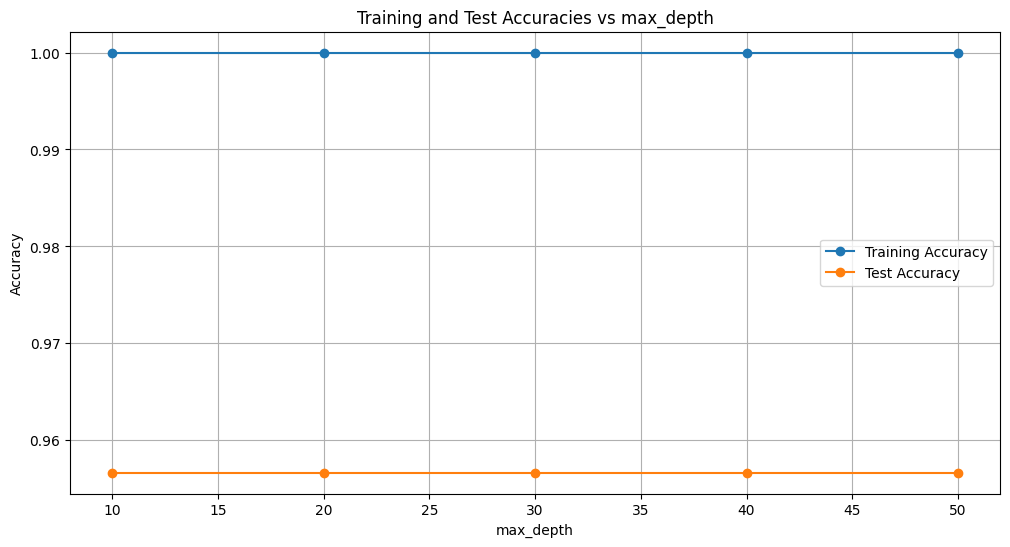

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


min_samples_split=2, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


min_samples_split=5, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


min_samples_split=10, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


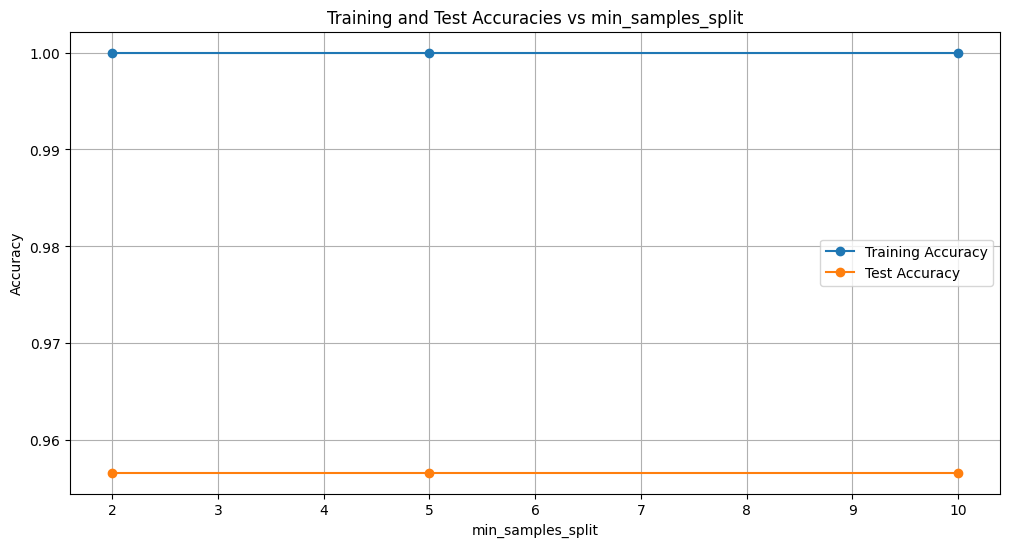

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


min_samples_leaf=1, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


min_samples_leaf=2, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


min_samples_leaf=4, Training Accuracy: 1.0, Test Accuracy: 0.9566309061858024


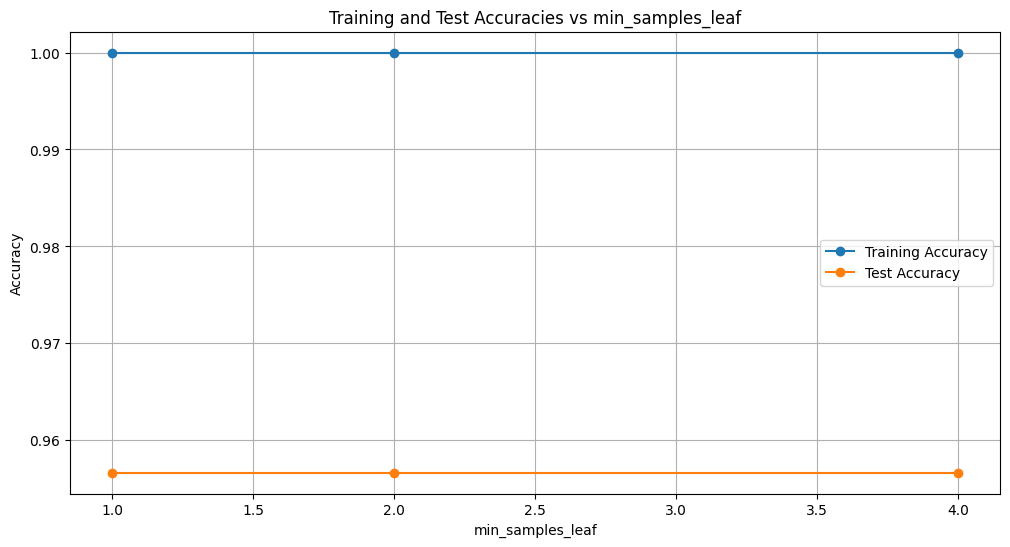

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


NameError: name 'y_test_adjusted' is not defined

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store accuracies for each parameter
train_accuracies = []
test_accuracies = []

# Initialize the Random Forest model with warm_start=True
final_rf_model = RandomForestClassifier(random_state=42, warm_start=True)

# Function to evaluate the model with a given parameter set
def evaluate_model(param_name, param_values, other_params):
    train_accuracies = []
    test_accuracies = []

    for value in param_values:
        # Set the parameter
        params = other_params.copy()
        params[param_name] = value
        final_rf_model.set_params(**params)
        
        # Fit the model incrementally and record accuracies
        final_rf_model.fit(X_train[selected_features], y_train)
        
        # Calculate training accuracy
        train_pred = final_rf_model.predict(X_train[selected_features])
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)
        
        # Calculate test accuracy
        test_pred = final_rf_model.predict(X_test[selected_features])
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracies.append(test_accuracy)
        
        print(f"{param_name}={value}, Training Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

    # Plot the accuracies
    plt.figure(figsize=(12, 6))
    plt.plot(param_values, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(param_values, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'Training and Test Accuracies vs {param_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters and their ranges
param_grids = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Other parameters that remain constant
other_params = {
    'n_estimators': best_params['n_estimators'],
    'bootstrap': best_params['bootstrap']
}

# Evaluate the model for each parameter
for param_name, param_values in param_grids.items():
    evaluate_model(param_name, param_values, other_params)

# Final evaluation on the test set
final_rf_model.set_params(**best_params)
final_rf_model.fit(X_train[selected_features], y_train)
y_pred = final_rf_model.predict(X_test[selected_features])
final_accuracy = accuracy_score(y_test_adjusted, y_pred)

print(f"Final Model Accuracy on Test Set: {final_accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train_adjusted), yticklabels=np.unique(y_train_adjusted))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
